In [ ]:
# 1. Import libraries
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels

In [ ]:
# 2. Import Data

# df = pd.read_excel("http://qrc.depaul.edu/Excel_Files/Presidents.xls") #pip install xlrd
df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/soccerratings.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/W3Store7.csv')

In [ ]:
# Columns 

df.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

In [ ]:
df

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,7/1/2009,2021.0,94,185 cm,80 kg,Right,2/5/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,7/1/2004,2018.0,93,170 cm,72 kg,Left,6/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,7/1/2013,2021.0,92,174 cm,68 kg,Right,2/5/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,7/11/2014,2021.0,92,182 cm,85 kg,Right,1/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,7/1/2011,2021.0,92,193 cm,92 kg,Right,3/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,NaN,Wexford Youths,Sub,30.0,2/1/2016,2020.0,45,183 cm,82 kg,Right,1/4/1998,19,GK,Medium / Medium,1,1,12,11,12,12,13,25,48,11,12,37,35,12,22,19,25,21,17,52,52,27,56,14,16,13,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Republic of Ireland,NaN,NaN,Longford Town,Sub,28.0,1/1/2016,2020.0,45,185 cm,80 kg,Right,11/8/1997,19,GK,Medium / Medium,2,1,13,11,11,12,11,15,43,11,12,27,22,14,27,26,16,19,21,42,45,28,53,12,17,12,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,England,NaN,NaN,Swindon Town,Res,32.0,3/3/2015,2023.0,45,173 cm,61 kg,Right,11/26/1998,18,CM,High / Medium,2,2,44,39,40,29,35,44,42,43,38,41,35,35,48,42,62,60,64,34,83,54,61,41,44,28,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Scotland,NaN,NaN,Ross County,Sub,45.0,3/2/2016,2017.0,45,180 cm,80 kg,Right,3/19/1996,21,GK,Medium / Medium,3,1,17,13,11,11,14,23,46,14,12,13,28,15,20,15,42,40,40,61,60,34,48,15,23,14,12,13,12,24,12,40,45,44,43,45


In [ ]:
df.head(7)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,7/1/2009,2021.0,94,185 cm,80 kg,Right,2/5/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,7/1/2004,2018.0,93,170 cm,72 kg,Left,6/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,7/1/2013,2021.0,92,174 cm,68 kg,Right,2/5/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,7/11/2014,2021.0,92,182 cm,85 kg,Right,1/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,7/1/2011,2021.0,92,193 cm,92 kg,Right,3/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,7/1/2011,2019.0,90,193 cm,82 kg,Right,11/7/1990,26,GK,Medium / Medium,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,7/1/2014,2021.0,90,185 cm,79 kg,Right,8/21/1988,28,ST,High / Medium,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10


In [ ]:
# Transpose data

df.head().T

,0,1,2,3,4
Name,Cristiano Ronaldo,Lionel Messi,Neymar,Luis Suárez,Manuel Neuer
Nationality,Portugal,Argentina,Brazil,Uruguay,Germany
National_Position,LS,RW,LW,LS,GK
National_Kit,7,10,10,9,1
Club,Real Madrid,FC Barcelona,FC Barcelona,FC Barcelona,FC Bayern
Club_Position,LW,RW,LW,ST,GK
Club_Kit,7,10,11,9,1
Club_Joining,7/1/2009,7/1/2004,7/1/2013,7/11/2014,7/1/2011
Contract_Expiry,2021,2018,2021,2021,2021
Rating,94,93,92,92,92


In [ ]:
# Check data types

df.dtypes

Name                   object
Nationality            object
National_Position      object
National_Kit          float64
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                  int64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                     int64
Preffered_Position     object
Work_Rate              object
Weak_foot               int64
Skill_Moves             int64
Ball_Control            int64
Dribbling               int64
Marking                 int64
Sliding_Tackle          int64
Standing_Tackle         int64
Aggression              int64
Reactions               int64
Attacking_Position      int64
Interceptions           int64
Vision                  int64
Composure               int64
Crossing                int64
Short_Pass              int64
Long_Pass               int64
Accelerati

In [ ]:
# Show number of Columns

len(df.columns)

53

In [ ]:
# Show number of unique items in column selected

len(df['Nationality'].unique())

159

In [ ]:
# Count of values in Column 
df.Nationality.value_counts()

# Can also be written as
# df['Nationality'].value_counts()

England                1618
Argentina              1097
Spain                  1008
France                  974
Brazil                  921
                       ... 
Gibraltar                 1
São Tomé & Príncipe       1
Lesotho                   1
Namibia                   1
Barbados                  1
Name: Nationality, Length: 159, dtype: int64

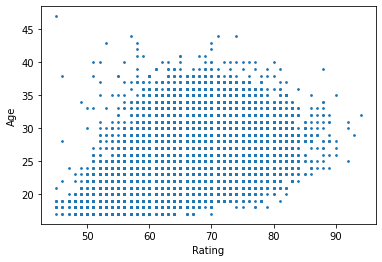

In [ ]:
df.plot.scatter(x='Rating', y='Age', s=3)

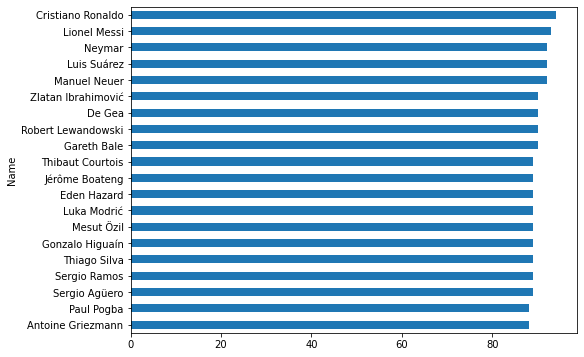

In [ ]:
(df.head(20)
 .set_index('Name')
 ['Rating']
 .sort_values()
#  ['Strength']
 .plot(kind='barh', figsize=(8,6))
 )

In [ ]:
df['Age'].agg(['min', 'mean', 'max'])

min     17.000000
mean    25.460314
max     47.000000
Name: Age, dtype: float64

In [ ]:
df['Strength'].describe()

count    17588.000000
mean        65.085854
std         12.532989
min         20.000000
25%         57.000000
50%         66.000000
75%         74.000000
max         98.000000
Name: Strength, dtype: float64

In [ ]:
df.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,12.219535,21.294536,2018.899414,66.166193,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,45.565499,47.441096,55.920173,61.770582,49.592051,46.794064,52.707869,55.853139,49.741073,58.119798,52.396065,65.287867,65.483853,63.476916,65.085854,64.008813,63.206732,64.918524,52.393109,55.581192,45.157607,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,6.933187,19.163741,1.698787,7.083012,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,21.515179,21.827815,17.445464,9.275210,19.407087,20.494715,14.589446,13.485994,18.457977,14.982582,15.616071,14.436296,14.100615,15.477377,12.532989,13.720288,14.618163,11.430807,17.473703,17.600155,19.374428,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,2.000000,29.000000,2.000000,3.000000,10.000000,5.000000,6.000000,10.000000,7.000000,11.000000,11.000000,10.000000,20.000000,10.000000,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,44.000000,55.000000,37.000000,26.000000,43.000000,47.000000,38.000000,52.000000,42.000000,57.000000,58.000000,57.000000,57.000000,56.000000,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,59.000000,62.000000,54.000000,52.000000,54.000000,57.000000,54.000000,62.000000,56.000000,68.000000,68.000000,66.000000,66.000000,65.000000,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,70.000000,68.000000,64.000000,64.000000,64.000000,66.000000,64.000000,68.000000,64.000000,75.000000,75.000000,74.000000,74.000000,74.000000,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,96.000000,96.000000,94.000000,93.000000,94.000000,94.000000,91.000000,92.000000,93.000000,96.000000,96.000000,95.000000,98.000000,97.000000,96.000000,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


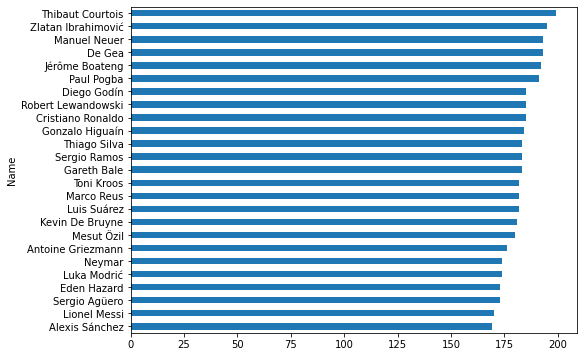

In [ ]:
df['Height'] = df['Height'].str.replace(' cm', '')
df['Height'] = df.Height.astype('int64')

(df.head(25)
 .set_index('Name')
 ['Height']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

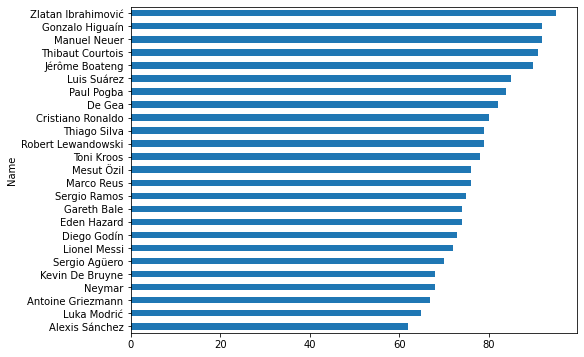

In [ ]:
# df['Weight'] = df['Weight'].str.replace(' kg', '')
# df['Weight'] = df.Weight.astype('int64')

(df.head(25)
 .set_index('Name')
 ['Weight']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

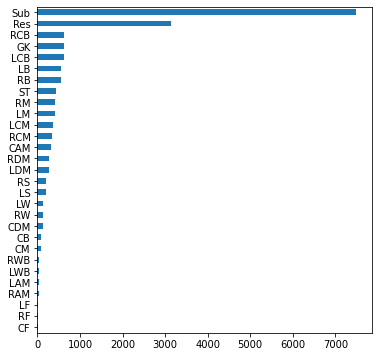

In [ ]:
(df.Club_Position
 .value_counts()
 .sort_values()
 .plot(kind="barh", figsize=(6,6))
 )

In [ ]:
# missing data
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

National_Position    93.887878
National_Kit         93.887878
Club_Position         0.005686
Club_Kit              0.005686
Club_Joining          0.005686
Contract_Expiry       0.005686
dtype: float64

In [ ]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

In [ ]:
# PCA
cols = ['Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(df[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [ ]:
X_pca.shape

(17588, 45)

In [ ]:
model.steps

[('std', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
      svd_solver='auto', tol=0.0, whiten=False))]

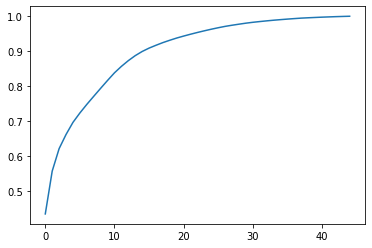

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.43488937, 0.55734369, 0.62156608, 0.66200332, 0.69659693,
       0.72343907, 0.74794652, 0.77107775, 0.7939415 , 0.81648276,
       0.83825117, 0.85665764, 0.87302724, 0.88732809, 0.89921931,
       0.90888985, 0.91701423, 0.92465995, 0.93138907, 0.93772117,
       0.94331561, 0.94862279, 0.95365328, 0.95840513, 0.96293376,
       0.96715292, 0.97105273, 0.97431407, 0.9773187 , 0.98020578,
       0.98267831, 0.98479162, 0.98678173, 0.9886414 , 0.99027714,
       0.99183748, 0.99327003, 0.99462508, 0.99561646, 0.99650541,
       0.99738239, 0.99812146, 0.99882842, 0.99943732, 1.        ])

In [ ]:
# Find columns that most influence components
comps = pd.DataFrame(pca.components_, columns=X.columns)
pca_cols = set()
num_comps = 2
for i in range(num_comps):
    parts = comps.iloc[i][comps.iloc[i].abs() > .2]
    pca_cols.update(set(parts.index))
pca_cols

{'Aggression',
 'Ball_Control',
 'Dribbling',
 'Finishing',
 'Interceptions',
 'Marking',
 'Short_Pass',
 'Sliding_Tackle',
 'Standing_Tackle',
 'Strength'}

In [ ]:
# How original columns impact each component
pd.DataFrame(pca.components_, columns=X.columns).loc[:,list(pca_cols)].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
Short_Pass,-0.205004,0.037397,0.073967,-0.065801,0.106249,0.060072,0.023090,0.009208,0.011356,-0.001853,-0.020261,-0.016215,-0.000780,-0.107619,-0.123794,0.122663,-0.163713,-0.107386,0.160432,-0.140249,0.201111,-0.107612,0.023076,-0.196902,0.165259,-0.083046,0.083749,-0.113213,-0.080331,-0.042084,0.085147,0.148511,-0.038011,0.054167,0.026731,-0.012814,-0.710953,0.115548,-0.268358,0.152435,-0.028188,0.010062,-0.001621,-0.022755,0.033602
Marking,-0.097938,0.357491,-0.019839,-0.137510,0.056000,0.056723,-0.003433,0.024381,0.026582,-0.009937,0.000392,-0.004953,-0.108717,0.019364,-0.018429,-0.044567,0.069856,0.087225,-0.045435,-0.073155,-0.038185,-0.094873,-0.157602,0.106662,-0.074642,0.040344,0.040200,-0.000895,0.023250,-0.028749,0.038196,0.080114,0.020356,-0.212461,-0.015503,0.013536,-0.035174,-0.066202,0.445975,0.677443,-0.157480,0.023128,-0.014475,-0.014124,-0.034548
Ball_Control,-0.215902,-0.028267,0.024069,0.001330,0.044198,0.002572,0.000821,-0.003914,-0.007563,-0.004490,-0.004738,-0.017101,-0.005273,-0.077635,-0.018021,0.109100,-0.048234,-0.033959,0.115942,-0.083052,0.107934,-0.014997,0.068211,-0.041566,-0.039209,-0.035377,0.095667,0.080191,-0.002782,-0.066834,0.202366,0.431773,0.209559,0.191079,0.074439,-0.041188,0.003337,-0.013275,0.627637,-0.385040,0.085648,-0.025456,0.004126,0.024106,0.020933
Interceptions,-0.106018,0.338895,0.041599,-0.156549,0.050634,0.049882,0.009267,0.030800,0.027785,-0.012410,0.011676,-0.011954,-0.097519,0.003410,-0.023410,-0.042053,0.088048,0.068909,-0.004397,0.048959,-0.064825,-0.062418,-0.133160,0.097879,-0.054769,0.077827,-0.029108,-0.015004,-0.145700,-0.070787,0.073632,-0.287570,-0.026019,0.736743,0.307633,-0.028052,0.041490,0.033871,-0.062334,-0.016124,-0.011907,0.003861,0.004717,-0.008827,0.086983
Standing_Tackle,-0.106475,0.350094,-0.018546,-0.139219,0.072114,0.064293,-0.005289,0.018320,0.019063,-0.003172,-0.003671,-0.007725,-0.104831,0.005529,-0.048475,-0.046775,0.055508,0.086539,-0.048098,-0.020180,-0.047900,-0.066572,-0.155015,0.134427,-0.083015,0.035740,0.018442,0.008249,-0.035135,-0.009425,0.035509,0.114357,-0.027350,-0.195189,-0.041899,0.004154,-0.045768,0.006253,-0.191215,-0.334311,0.086748,-0.016503,-0.016496,0.074224,-0.727773
Aggression,-0.139084,0.250096,0.100915,0.029808,-0.057691,-0.064145,-0.020052,-0.016044,-0.017514,-0.002356,-0.012409,-0.031082,-0.026886,0.015369,0.021727,-0.023359,0.082413,-0.183495,-0.200678,0.563648,0.458918,0.397789,0.153530,0.131444,0.219214,-0.114928,0.116063,-0.005484,-0.031960,-0.005947,-0.005902,-0.028384,0.075500,-0.057625,0.006427,-0.004463,-0.010618,-0.032575,0.012212,0.016548,-0.007148,0.001703,-0.000943,0.001250,0.001975
Finishing,-0.176914,-0.202180,0.054389,0.158459,0.006413,-0.057639,-0.034967,-0.024439,-0.047683,0.024972,-0.039416,-0.027132,0.080905,-0.014144,-0.027012,-0.011827,0.131651,-0.069687,0.077818,-0.008698,0.027928,-0.058424,-0.179912,0.134599,-0.101992,-0.007147,0.059422,-0.051834,-0.177907,-0.295170,0.075326,-0.139823,0.087876,-0.359466,0.686550,0.145128,0.004832,-0.074089,-0.040508,-0.022357,0.016484,0.003218,0.006053,-0.001594,0.027869
Dribbling,-0.209555,-0.093999,-0.026943,-0.040209,0.026467,0.006679,-0.000928,-0.009414,-0.010044,-0.000017,-0.009675,-0.036506,-0.011936,-0.074053,0.020507,0.041567,-0.035025,-0.023470,0.136814,-0.063278,0.078467,0.050177,0.061614,0.105720,-0.148286,-0.086126,0.107059,0.136242,-0.041664,-0.098613,0.196070,0.415568,0.242968,0.135710,-0.073183,-0.011679,0.449584,0.021739,-0.471744,0.301618,-0.066552,0.024236,-0.001256,-0.010005,-0.020458
Sliding_Tackle,-0.099143,0.351515,-0.037944,-0.164931,0.063511,0.063732,-0.002468,0.018406,0.024770,-0.006943,0.004347,-0.010195,-0.116063,0.019300,-0.046785,-0.056382,0.065288,0.093767,-0.054832,-0.051815,-0.031235,-0.059444,-0.158420,0.144060,-0.088335,0.015266,0.028073,0.016564,0.004092,0.004313,0.013659,0.147179,-0.040467,-0.306918,-0.1

In [ ]:
# add coloring
(pd.DataFrame(pca.components_, columns=X.columns)
 .loc[:,list(pca_cols)]
 .T
 .style.background_gradient(cmap='RdBu', axis=0)
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
Short_Pass,-0.205004,0.037397,0.073967,-0.065801,0.106249,0.060072,0.023090,0.009208,0.011356,-0.001853,-0.020261,-0.016215,-0.000780,-0.107619,-0.123794,0.122663,-0.163713,-0.107386,0.160432,-0.140249,0.201111,-0.107612,0.023076,-0.196902,0.165259,-0.083046,0.083749,-0.113213,-0.080331,-0.042084,0.085147,0.148511,-0.038011,0.054167,0.026731,-0.012814,-0.710953,0.115548,-0.268358,0.152435,-0.028188,0.010062,-0.001621,-0.022755,0.033602
Marking,-0.097938,0.357491,-0.019839,-0.137510,0.056000,0.056723,-0.003433,0.024381,0.026582,-0.009937,0.000392,-0.004953,-0.108717,0.019364,-0.018429,-0.044567,0.069856,0.087225,-0.045435,-0.073155,-0.038185,-0.094873,-0.157602,0.106662,-0.074642,0.040344,0.040200,-0.000895,0.023250,-0.028749,0.038196,0.080114,0.020356,-0.212461,-0.015503,0.013536,-0.035174,-0.066202,0.445975,0.677443,-0.157480,0.023128,-0.014475,-0.014124,-0.034548
Ball_Control,-0.215902,-0.028267,0.024069,0.001330,0.044198,0.002572,0.000821,-0.003914,-0.007563,-0.004490,-0.004738,-0.017101,-0.005273,-0.077635,-0.018021,0.109100,-0.048234,-0.033959,0.115942,-0.083052,0.107934,-0.014997,0.068211,-0.041566,-0.039209,-0.035377,0.095667,0.080191,-0.002782,-0.066834,0.202366,0.431773,0.209559,0.191079,0.074439,-0.041188,0.003337,-0.013275,0.627637,-0.385040,0.085648,-0.025456,0.004126,0.024106,0.020933
Interceptions,-0.106018,0.338895,0.041599,-0.156549,0.050634,0.049882,0.009267,0.030800,0.027785,-0.012410,0.011676,-0.011954,-0.097519,0.003410,-0.023410,-0.042053,0.088048,0.068909,-0.004397,0.048959,-0.064825,-0.062418,-0.133160,0.097879,-0.054769,0.077827,-0.029108,-0.015004,-0.145700,-0.070787,0.073632,-0.287570,-0.026019,0.736743,0.307633,-0.028052,0.041490,0.033871,-0.062334,-0.016124,-0.011907,0.003861,0.004717,-0.008827,0.086983
Standing_Tackle,-0.106475,0.350094,-0.018546,-0.139219,0.072114,0.064293,-0.005289,0.018320,0.019063,-0.003172,-0.003671,-0.007725,-0.104831,0.005529,-0.048475,-0.046775,0.055508,0.086539,-0.048098,-0.020180,-0.047900,-0.066572,-0.155015,0.134427,-0.083015,0.035740,0.018442,0.008249,-0.035135,-0.009425,0.035509,0.114357,-0.027350,-0.195189,-0.041899,0.004154,-0.045768,0.006253,-0.191215,-0.334311,0.086748,-0.016503,-0.016496,0.074224,-0.727773
Aggression,-0.139084,0.250096,0.100915,0.029808,-0.057691,-0.064145,-0.020052,-0.016044,-0.017514,-0.002356,-0.012409,-0.031082,-0.026886,0.015369,0.021727,-0.023359,0.082413,-0.183495,-0.200678,0.563648,0.458918,0.397789,0.153530,0.131444,0.219214,-0.114928,0.116063,-0.005484,-0.031960,-0.005947,-0.005902,-0.028384,0.075500,-0.057625,0.006427,-0.004463,-0.010618,-0.032575,0.012212,0.016548,-0.007148,0.001703,-0.000943,0.001250,0.001975
Finishing,-0.176914,-0.202180,0.054389,0.158459,0.006413,-0.057639,-0.034967,-0.024439,-0.047683,0.024972,-0.039416,-0.027132,0.080905,-0.014144,-0.027012,-0.011827,0.131651,-0.069687,0.077818,-0.008698,0.027928,-0.058424,-0.179912,0.134599,-0.101992,-0.007147,0.059422,-0.051834,-0.177907,-0.295170,0.075326,-0.139823,0.087876,-0.359466,0.686550,0.145128,0.004832,-0.074089,-0.040508,-0.022357,0.016484,0.003218,0.006053,-0.001594,0.027869
Dribbling,-0.209555,-0.093999,-0.026943,-0.040209,0.026467,0.006679,-0.000928,-0.009414,-0.010044,-0.000017,-0.009675,-0.036506,-0.011936,-0.074053,0.020507,0.041567,-0.035025,-0.023470,0.136814,-0.063278,0.078467,0.050177,0.061614,0.105720,-0.148286,-0.086126,0.107059,0.136242,-0.041664,-0.098613,0.196070,0.415568,0.242968,0.135710,-0.073183,-0.011679,0.449584,0.021739,-0.471744,0.301618,-0.066552,0.024236,-0.001256,-0.010005,-0.020458
Sliding_Tackle,-0.099143,0.351515,-0.037944,-0.164931,0.063511,0.063732,-0.002468,0.018406,0.024770,-0.006943,0.004347,-0.010195,-0.116063,0.019300,-0.046785,-0.056382,0.065288,0.093767,-0.054832,-0.051815,-0.031235,-0.059444,-0.158420,0.144060,-0.088335,0.015266,0.028073,0.016564,0.004092,0.004313,0.013659,0.147179,-0.040467,-0.306918,-0.1

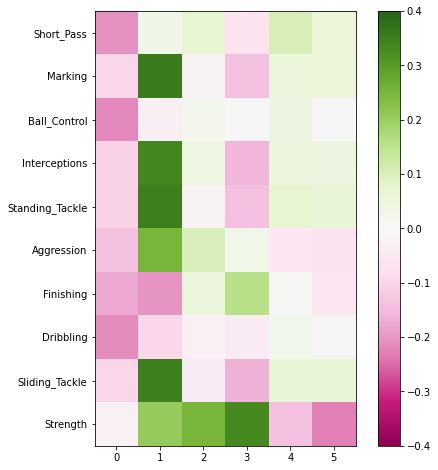

In [ ]:
#Alternate view
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(pd.DataFrame(pca.components_, columns=X.columns).loc[:5, list(pca_cols)].T, 
           cmap='PiYG', vmin=-.4, vmax=.4)
plt.yticks(range(len(pca_cols)), list(pca_cols))
plt.colorbar()

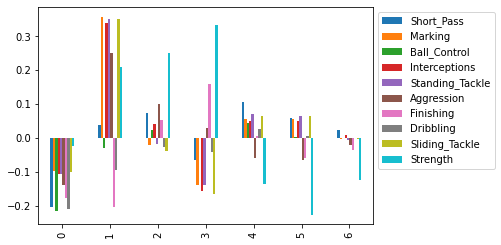

In [ ]:
# visualize amount
comps = pd.DataFrame(pca.components_, columns=X.columns)
comps[list(pca_cols)].iloc[:7].plot.bar().legend(bbox_to_anchor=(1,1))